## Machine Learning mit IoT Testdaten

Basierend auf den Daten vom Temperatur und Luftfeuchtigssensor.

Zuerst holen wir alle Libraries wo benötigt werden

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pylab as plt
import numpy as np
from distutils.version import StrictVersion
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

Populating the interactive namespace from numpy and matplotlib
0.19.2


Daten einlesen und evtl. Schmutz entfernen

In [2]:
import pandas as pd

df = pd.read_csv('data.csv', header=None, names=['sensor', 'temp', 'hum', 'class'] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )

In [3]:
df.head()

,sensor,temp,hum,class
7,0xBC,25.5,51.3,middle
8,0xBC,30.4,51.2,high
9,0xBC,20.4,51.4,low
10,0xBC,25.4,51.2,middle
11,0xBC,30.5,51.3,high


In [4]:
df.groupby('class').count()

,sensor,temp,hum
class,,,
high,112,112,112
low,112,112,112
middle,113,113,113


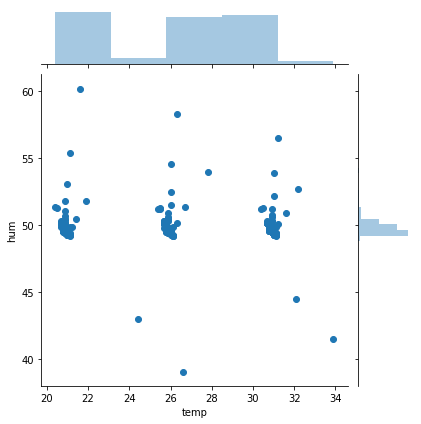

In [5]:
import seaborn as sns
sns.jointplot(df['temp'], df['hum'])

In [83]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)
X = df[['temp', 'hum']]
y = df[['class']]
y = ravel( y )
clf.fit( X, y )
clf.score( X, y )

1.0

## Gegenprüfung mit Testdaten

In [84]:
test = pd.read_csv('test.csv', header=None, names=['sensor', 'temp', 'hum', 'class'] )
test.head()

,sensor,temp,hum,class
0,0xBC,20.4,51.6,low
1,0xBC,25.4,51.6,middle
2,0xBC,30.4,51.5,high
3,0xBC,20.4,51.4,low
4,0xBC,25.4,51.5,middle


In [85]:
X = test[['temp', 'hum']]
y = test[['class']]
y = ravel( y )
clf.score( X, y )

0.99127906976744184